In [1]:
!unzip files.zip
!rm -rf files.zip

Archive:  files.zip
  inflating: computations_cpu.py     
  inflating: computations_pycuda.py  
  inflating: computations_torch.py   
  inflating: control_method2_3d.py   
  inflating: control_method_3d_gif.py  
  inflating: control_method_3d.py    
  inflating: pixel_method_3d.py      


In [2]:
!pip install pycuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 64.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.8 MB/s eta 0:00:00
  Created wheel for pycuda: filename=pycuda-2025.1.2-cp312-cp312-linux_x86_64.whl size=659050 sha256=ebd912fbfde27d5d3158abde7c1aea26756986209405b2c74d79f1d5fbcc1c2b
  Stored in directory: /root/.cache/pip/wheels/d5/36/f3/ac5f09d768cad3fa15d5a3449bdfe65c3de58e69d036c73228
Successfully built pycuda


In [3]:
import importlib
from module_3d import computations_pycuda as comp_pycuda

print("_pycuda_available:", getattr(comp_pycuda, "_pycuda_available", None))


_pycuda_available: True


In [13]:
%matplotlib inline
importlib.reload(comp_pycuda)

<module 'computations_pycuda' from '/content/computations_pycuda.py'>

In [4]:
import torch
print("CUDA Available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))
!nvidia-smi

CUDA Available: True
GPU Name: Tesla T4
Sun Nov  9 16:15:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P0             28W /   70W |     102MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-------

Running CPU version for RK4
0.0 10
0.47123889803846897 63
0.9424777960769379 286
1.413716694115407 1032
1.8849555921538759 2999
2.356194490192345 7405
2.827433388230814 15010
3.2986722862692828 25627
3.7699111843077517 38557
4.241150082346221 54540
4.71238898038469 73115
RK4 Время:  33.4363907190002
218645.0


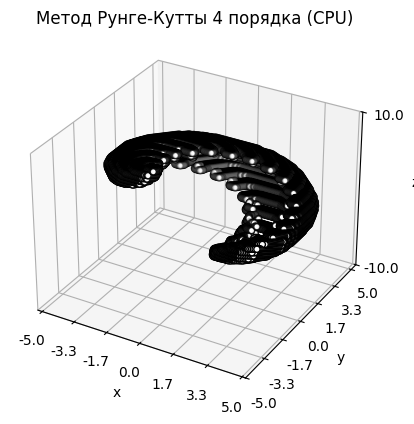

Running TORCH version for RK4


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


0.0 10
0.471238911151886 63
0.942477822303772 286
1.4137166738510132 1032
1.884955644607544 2999
2.356194496154785 7405
2.8274333477020264 15010
3.2986721992492676 25627
3.769911289215088 38557
4.24114990234375 54540
4.71238899230957 73115
RK4 Время:  1.9770349909999823
218645.0


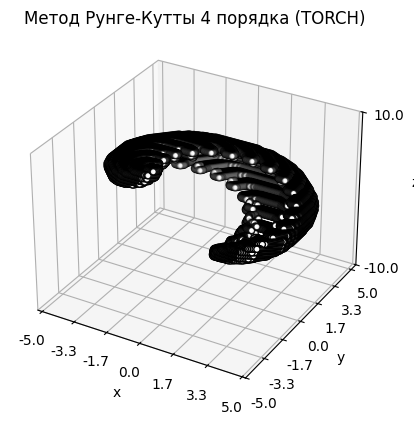

Running PYCUDA version for RK4


/content/computations_pycuda.py:282: UserWarning: The CUDA compiler succeeded, but said the following:
kernel.cu(70): warning #177-D: variable "xm" was declared but never referenced
          float xm = x + k1x * half_dt;
                ^

Remark: The warnings can be suppressed with "-diag-suppress <warning-number>"

kernel.cu(71): warning #177-D: variable "ym" was declared but never referenced
          float ym = y + k1y * half_dt;
                ^


  return SourceModule(_GPU_SRC, options=['-use_fast_math'])


0.0 10
0.471238911151886 63
0.942477822303772 286
1.4137166738510132 1032
1.884955644607544 2999
2.356194496154785 7405
2.8274333477020264 15010
3.2986721992492676 25627
3.769911289215088 38557
4.24114990234375 54540
4.71238899230957 73115
RK4 Время:  1.6043192719998842
218645.0


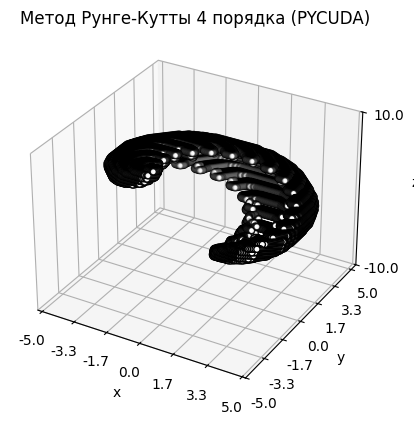

RK4 times: CPU 33.4363907190002, TORCH 1.9770349909999823, PYCUDA 1.6043192719998842
Running CPU version for RK2
0.0 10
0.47123889803846897 64
0.9424777960769379 287
1.413716694115407 1025
1.8849555921538759 2960
2.356194490192345 7274
2.827433388230814 14756
3.2986722862692828 25256
3.7699111843077517 38133
4.241150082346221 54123
4.71238898038469 72738
RK2 Время:  29.52589834100013


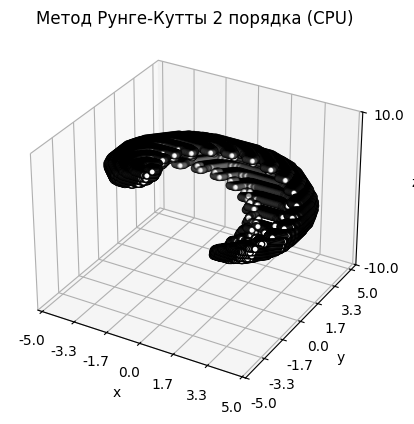

Running TORCH version for RK2
0.0 10
0.471238911151886 64
0.942477822303772 287
1.4137166738510132 1025
1.884955644607544 2960
2.356194496154785 7274


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


2.8274333477020264 14756
3.2986721992492676 25256
3.769911289215088 38133
4.24114990234375 54123
4.71238899230957 72738
RK2 Время:  0.7827735880000546


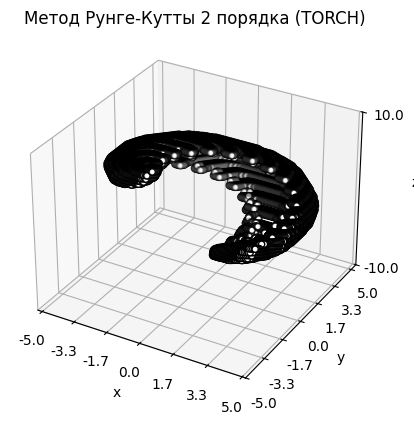

Running PYCUDA version for RK2
0.0 10
0.471238911151886 64
0.942477822303772 287
1.4137166738510132 1025
1.884955644607544 2960
2.356194496154785 7274
2.8274333477020264 14756
3.2986721992492676 25256
3.769911289215088 38133
4.24114990234375 54123
4.71238899230957 72738
RK2 Время:  0.20473458800006483


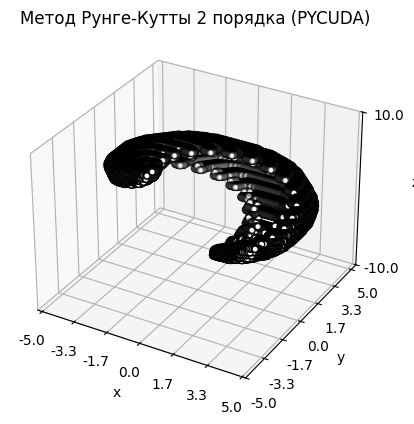

RK2 times: CPU 29.52589834100013, TORCH 0.7827735880000546, PYCUDA 0.20473458800006483
Running CPU version for Euler
0.0 3
0.47123889803846897 9
0.9424777960769379 23
1.413716694115407 56
1.8849555921538759 130
2.356194490192345 293
2.827433388230814 645
3.2986722862692828 1390
3.7699111843077517 2938
4.241150082346221 6086
4.71238898038469 12255
Euler Время:  2.7340701950001858


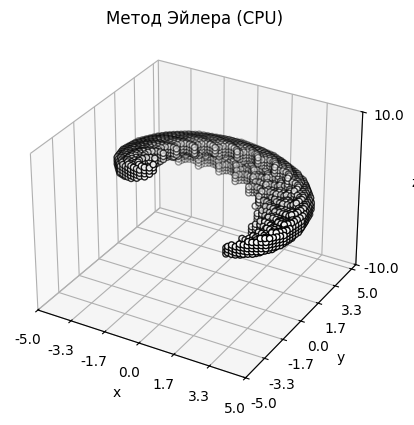

Running TORCH version for Euler
0.0 3
0.471238911151886 9
0.942477822303772 23
1.4137166738510132 56
1.884955644607544 130
2.356194496154785 293
2.8274333477020264 645
3.2986721992492676 1390
3.769911289215088 2938
4.24114990234375 6086
4.71238899230957 12255


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


Euler Время:  0.2627590849999706


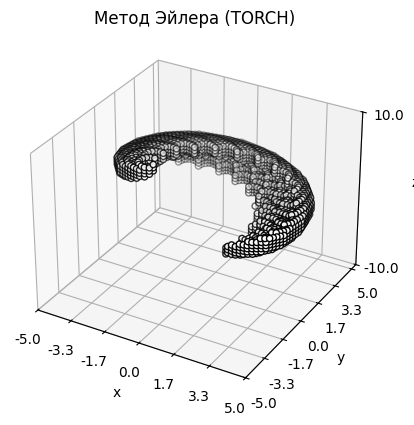

Running PYCUDA version for Euler
0.0 3
0.471238911151886 9
0.942477822303772 23
1.4137166738510132 56
1.884955644607544 130
2.356194496154785 293
2.8274333477020264 645
3.2986721992492676 1390
3.769911289215088 2938
4.24114990234375 6086
4.71238899230957 12255
Euler Время:  0.06310641499999292


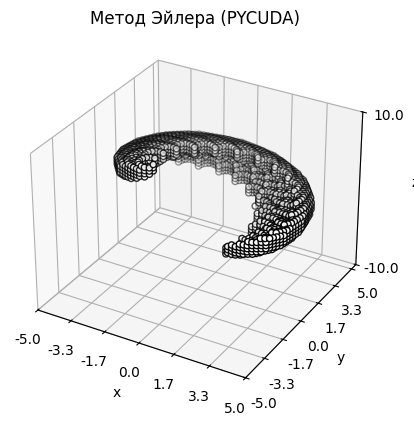

Euler times: CPU 2.7340701950001858, TORCH 0.2627590849999706, PYCUDA 0.06310641499999292


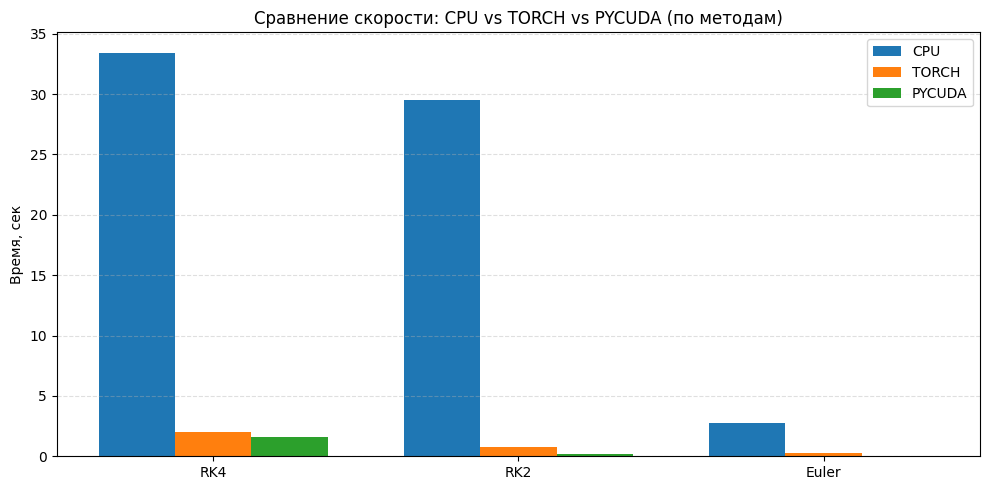

<Figure size 640x480 with 0 Axes>

In [5]:
%run /content/pixel_method_3d.py


Running control_method_3d.py
RK4 Время: 64.76723533099994


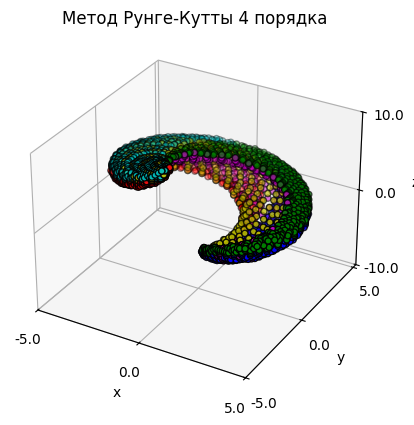

RK2 Время: 31.296177938000028


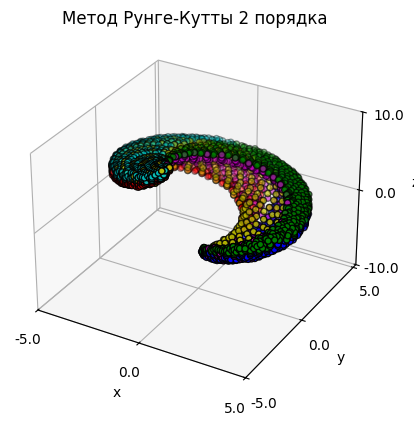

Euler Время: 16.651514576999944


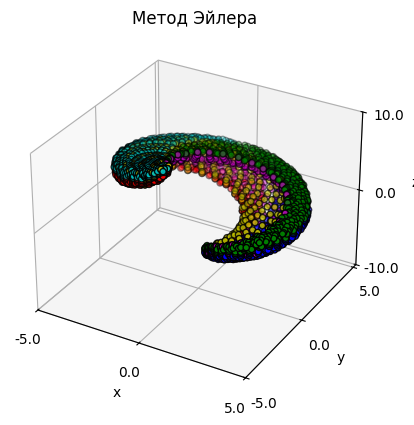


Running control_method_3d_gif.py
RK4 Время: 64.30900254300013


<Figure size 640x480 with 0 Axes>

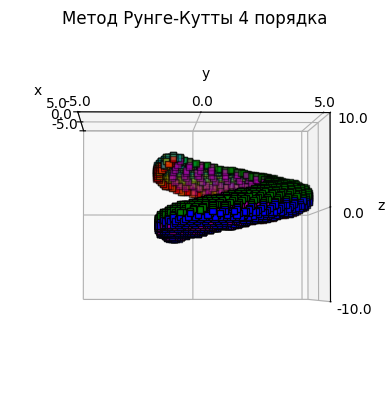

RK2 Время: 31.736525638000103


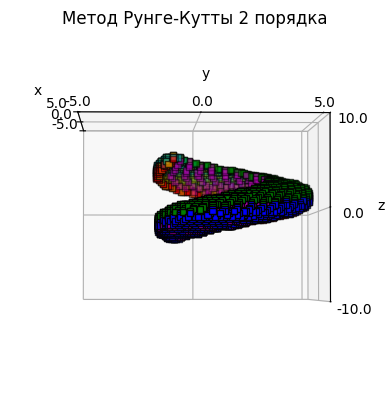

Euler Время: 16.72004670000001


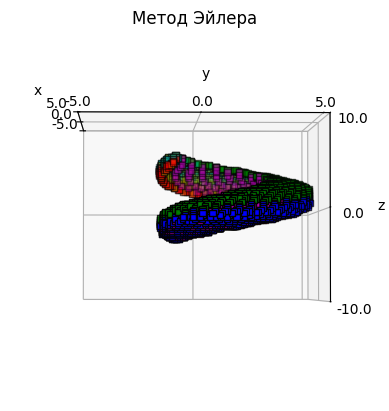


Running control_method2_3d.py
RK4 Время: 64.39425645999995


<Figure size 640x480 with 0 Axes>

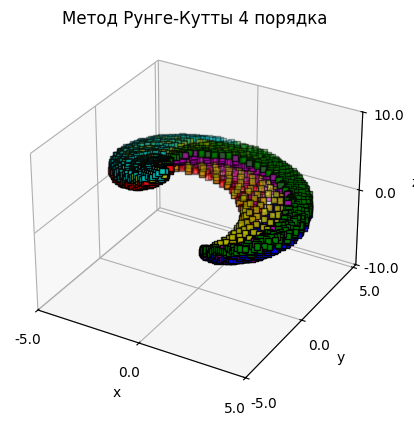

RK2 Время: 31.086119500999757


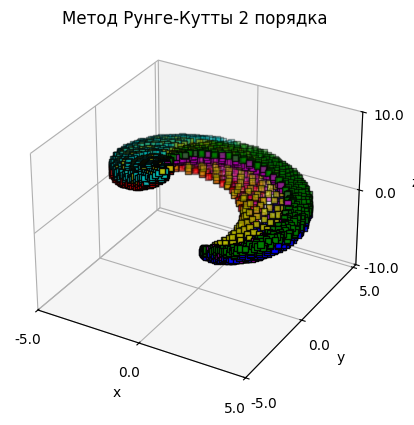

Euler Время: 16.68258059999971


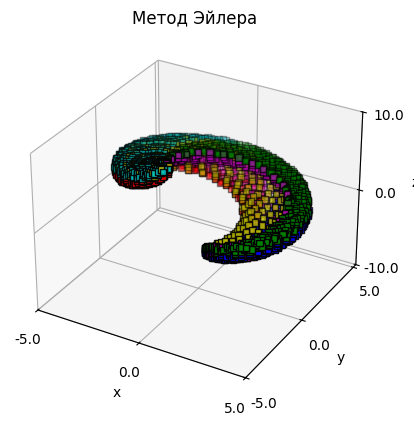


Running pixel_method_3d.py
Running CPU version for RK4
0.0 10
0.47123889803846897 63
0.9424777960769379 286
1.413716694115407 1032
1.8849555921538759 2999
2.356194490192345 7405
2.827433388230814 15010
3.2986722862692828 25627
3.7699111843077517 38557
4.241150082346221 54540
4.71238898038469 73115
RK4 Время:  30.622946934000083
218645.0


<Figure size 640x480 with 0 Axes>

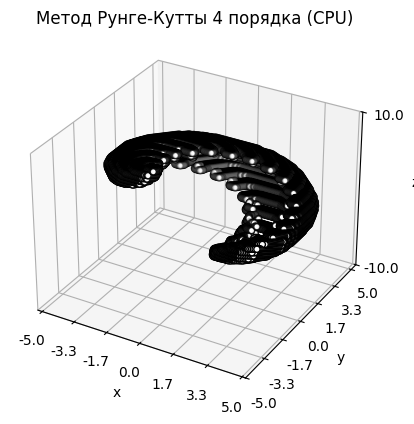

Running TORCH version for RK4
0.0 10
0.471238911151886 63


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


0.942477822303772 286
1.4137166738510132 1032
1.884955644607544 2999
2.356194496154785 7405
2.8274333477020264 15010
3.2986721992492676 25627
3.769911289215088 38557
4.24114990234375 54540
4.71238899230957 73115
RK4 Время:  1.4057038849996388
218645.0


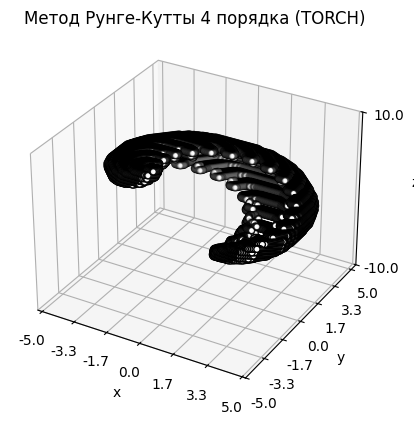

Running PYCUDA version for RK4
0.0 10
0.471238911151886 63
0.942477822303772 286
1.4137166738510132 1032
1.884955644607544 2999
2.356194496154785 7405
2.8274333477020264 15010
3.2986721992492676 25627
3.769911289215088 38557
4.24114990234375 54540
4.71238899230957 73115
RK4 Время:  0.18708447099970726
218645.0


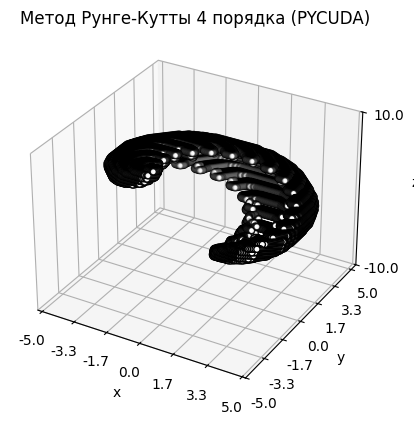

RK4 times: CPU 30.622946934000083, TORCH 1.4057038849996388, PYCUDA 0.18708447099970726
Running CPU version for RK2
0.0 10
0.47123889803846897 64
0.9424777960769379 287
1.413716694115407 1025
1.8849555921538759 2960
2.356194490192345 7274
2.827433388230814 14756
3.2986722862692828 25256
3.7699111843077517 38133
4.241150082346221 54123
4.71238898038469 72738
RK2 Время:  28.65014060400017


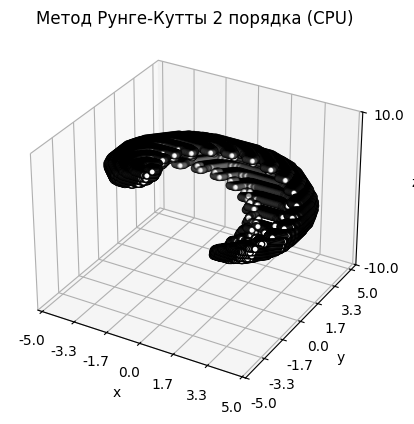

Running TORCH version for RK2
0.0 10
0.471238911151886 64
0.942477822303772 287
1.4137166738510132 1025
1.884955644607544 2960
2.356194496154785 7274


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


2.8274333477020264 14756
3.2986721992492676 25256
3.769911289215088 38133
4.24114990234375 54123
4.71238899230957 72738
RK2 Время:  0.7983740110003055


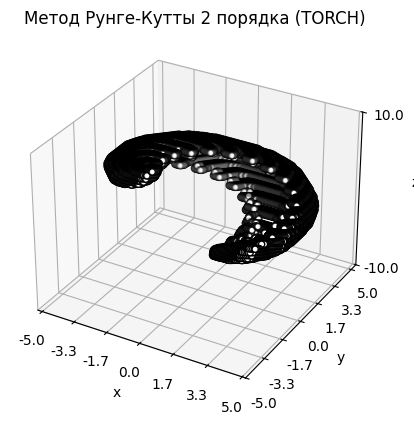

Running PYCUDA version for RK2
0.0 10
0.471238911151886 64
0.942477822303772 287
1.4137166738510132 1025
1.884955644607544 2960
2.356194496154785 7274
2.8274333477020264 14756
3.2986721992492676 25256
3.769911289215088 38133
4.24114990234375 54123
4.71238899230957 72738
RK2 Время:  0.21615608000001885


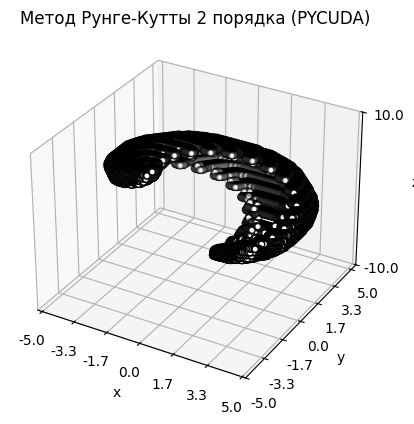

RK2 times: CPU 28.65014060400017, TORCH 0.7983740110003055, PYCUDA 0.21615608000001885
Running CPU version for Euler
0.0 3
0.47123889803846897 9
0.9424777960769379 23
1.413716694115407 56
1.8849555921538759 130
2.356194490192345 293
2.827433388230814 645
3.2986722862692828 1390
3.7699111843077517 2938
4.241150082346221 6086
4.71238898038469 12255
Euler Время:  2.405668205999973


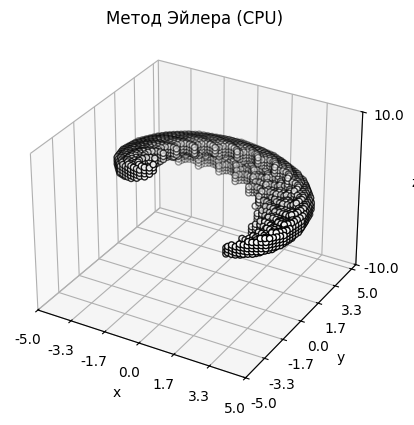

Running TORCH version for Euler
0.0 3
0.471238911151886 9
0.942477822303772 23
1.4137166738510132 56
1.884955644607544 130
2.356194496154785 293
2.8274333477020264 645
3.2986721992492676 1390
3.769911289215088 2938
4.24114990234375 6086
4.71238899230957 12255


/content/computations_torch.py:144: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  time_t = torch.tensor(time, device=device, dtype=torch.float32)


Euler Время:  0.24573791800003164


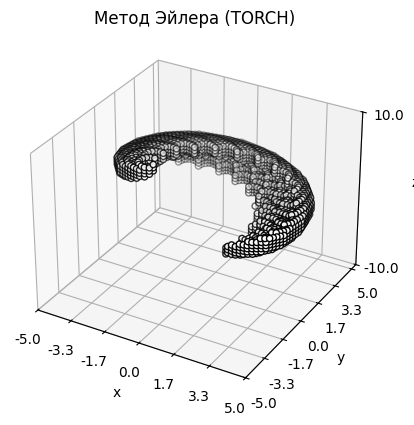

Running PYCUDA version for Euler
0.0 3
0.471238911151886 9
0.942477822303772 23
1.4137166738510132 56
1.884955644607544 130
2.356194496154785 293
2.8274333477020264 645
3.2986721992492676 1390
3.769911289215088 2938
4.24114990234375 6086
4.71238899230957 12255
Euler Время:  0.07351716200037117


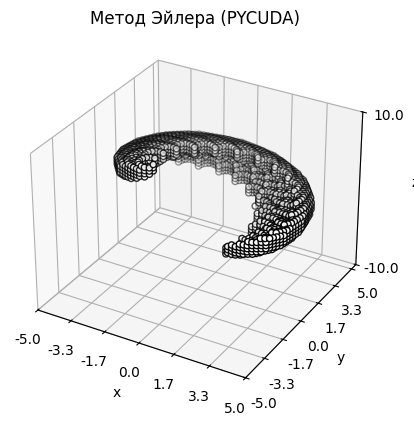

Euler times: CPU 2.405668205999973, TORCH 0.24573791800003164, PYCUDA 0.07351716200037117


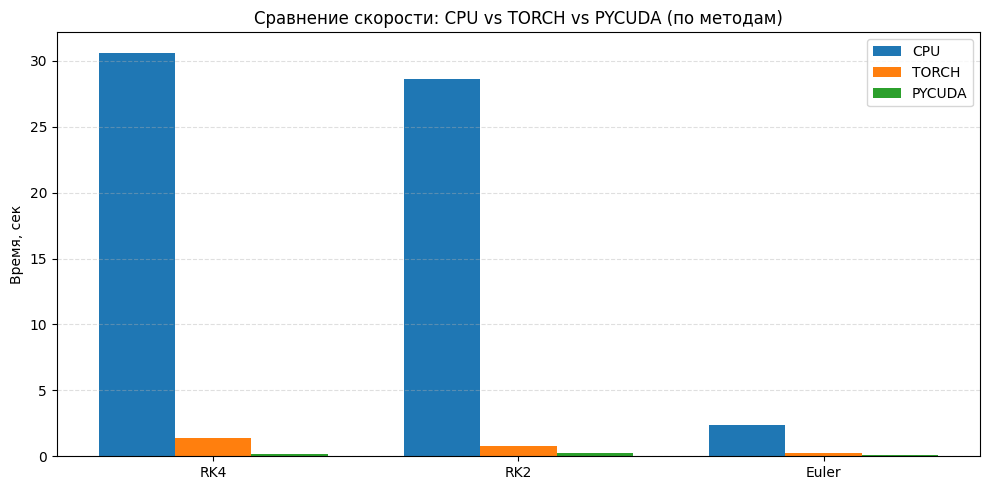

<Figure size 640x480 with 0 Axes>

In [7]:
# Run control_method_3d.py
print("\nRunning control_method_3d.py\n" + "="*50)
%run /content/control_method_3d.py

# Run control_method_3d_gif.py
print("\nRunning control_method_3d_gif.py\n" + "="*50)
%run /content/control_method_3d_gif.py

# Run control_method2_3d.py
print("\nRunning control_method2_3d.py\n" + "="*50)
%run /content/control_method2_3d.py

# Run pixel_method_3d.py
print("\nRunning pixel_method_3d.py\n" + "="*50)
%run /content/pixel_method_3d.py

In [8]:
!zip files.zip computations_cpu.py computations_pycuda.py computations_torch.py control_method2_3d.py control_method_3d_gif.py control_method_3d.py pixel_method_3d.py


  adding: computations_cpu.py (deflated 71%)
  adding: computations_pycuda.py (deflated 71%)
  adding: computations_torch.py (deflated 74%)
  adding: control_method2_3d.py (deflated 65%)
  adding: control_method_3d_gif.py (deflated 64%)
  adding: control_method_3d.py (deflated 65%)
  adding: pixel_method_3d.py (deflated 76%)
